In [4]:
import numpy as np
import torch
import torch.nn as nn
import os, time
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave, imshow
import cv2

In [5]:
def save_result(result, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    if ext in ('.txt', '.dlm'):
        np.savetxt(path, result, fmt='%2.4f')
    else:
        imsave(path, np.clip(result, 0, 1))

def save_residual(r, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    
    r = 2*(r+0.4)-0.3
    imsave(path, np.clip(r, 0, 1))

def save_structure(s, path):
    path = path if path.find('.') != -1 else path+'.png'
    ext = os.path.splitext(path)[-1]
    
    #s = 4*(s+0.3)-0.7
    s = 1.8*(s+0.7)-0.8
    imsave(path, np.clip(s, 0, 1))

def show(x, title=None, cbar=False, figsize=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.imshow(x, interpolation='nearest', cmap='gray')
    if title:
        plt.title(title)
    if cbar:
        plt.colorbar()
    plt.show()

In [6]:
class DnCNN(nn.Module):
    def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        d_layers = []

        d_layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
        d_layers.append(nn.ReLU(inplace=True))
        for _ in range(depth-2):
            d_layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
            d_layers.append(nn.BatchNorm2d(n_channels, eps=0.0001, momentum = 0.95))
            d_layers.append(nn.ReLU(inplace=True))
        d_layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*d_layers)

    def forward(self, x):
        r = self.dncnn(x)
        return r

### Test DNet

DnCNN(
  (dncnn): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): BatchNorm2d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (4): ReLU(inplace)
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (6): BatchNorm2d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (7): ReLU(inplace)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (12): BatchNorm2d(64, eps=0.0001, momentum=0.95, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

c:\users\cvlab\anaconda3\envs\env1_1\lib\site-packages\torch\serialization.py:400: UserWarning: Couldn't retrieve source code for container of type DnCNN. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


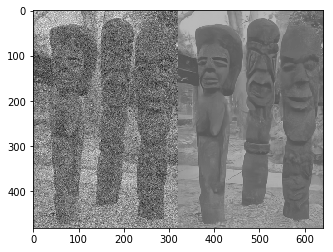

     Set68 : test002.png : 0.0259 second


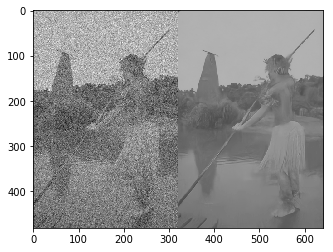

     Set68 : test003.png : 0.0259 second


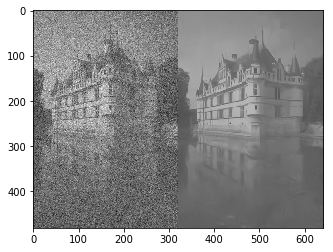

     Set68 : test004.png : 0.0259 second


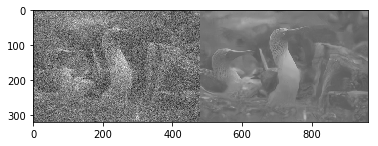

     Set68 : test005.png : 0.0270 second


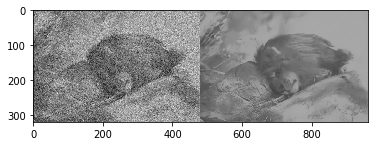

     Set68 : test006.png : 0.0269 second


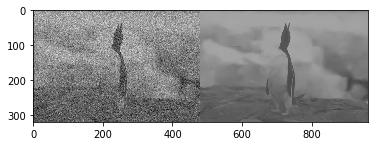

     Set68 : test007.png : 0.0269 second


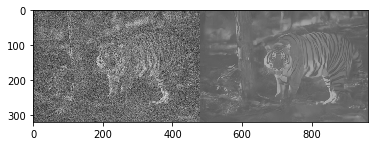

     Set68 : test008.png : 0.0249 second


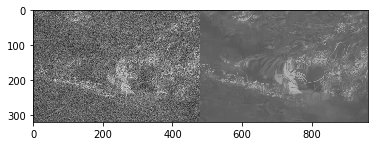

     Set68 : test009.png : 0.0259 second


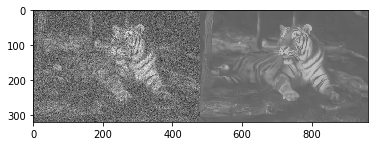

     Set68 : test010.png : 0.0259 second


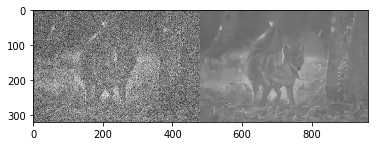

     Set68 : test011.png : 0.0259 second


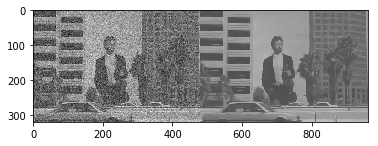

     Set68 : test012.png : 0.0259 second


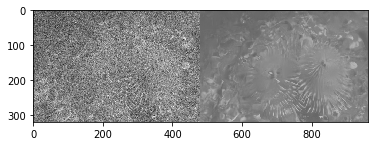

     Set68 : test013.png : 0.0259 second


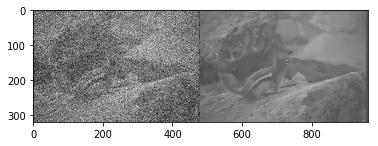

     Set68 : test014.png : 0.0259 second


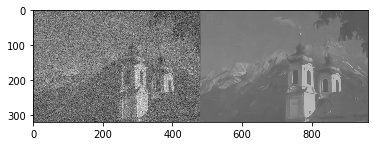

     Set68 : test015.png : 0.0259 second


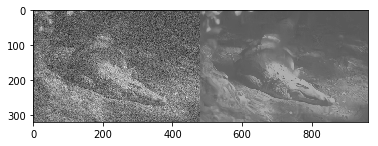

     Set68 : test016.png : 0.0269 second


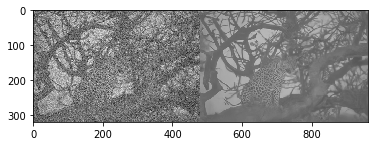

     Set68 : test017.png : 0.0279 second


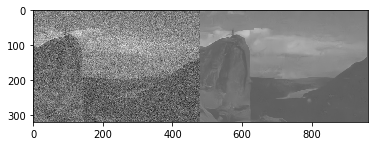

     Set68 : test018.png : 0.0259 second


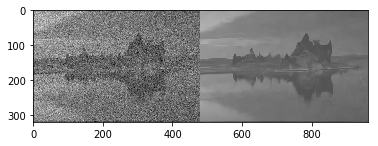

     Set68 : test019.png : 0.0259 second


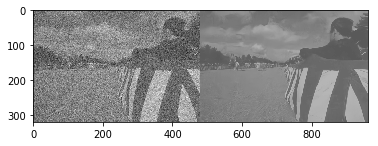

     Set68 : test020.png : 0.0259 second


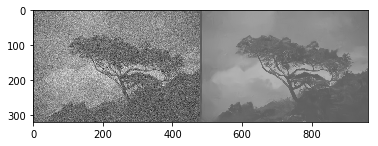

     Set68 : test021.png : 0.0259 second


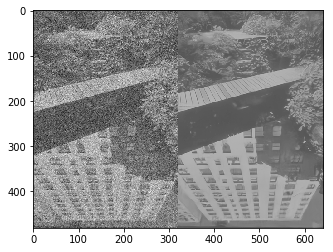

     Set68 : test022.png : 0.0259 second


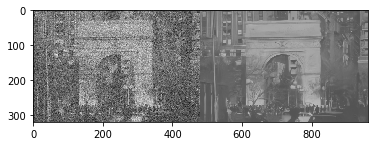

     Set68 : test023.png : 0.0269 second


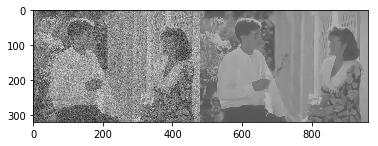

     Set68 : test024.png : 0.0260 second


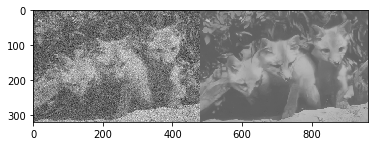

     Set68 : test025.png : 0.0259 second


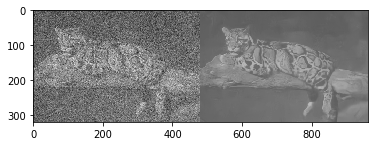

     Set68 : test026.png : 0.0259 second


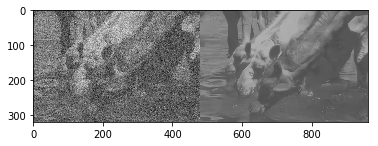

     Set68 : test027.png : 0.0259 second


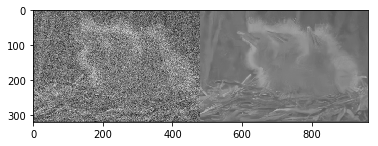

     Set68 : test028.png : 0.0269 second


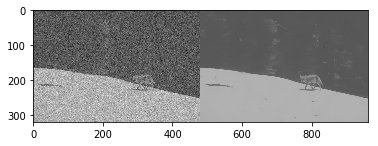

     Set68 : test029.png : 0.0259 second


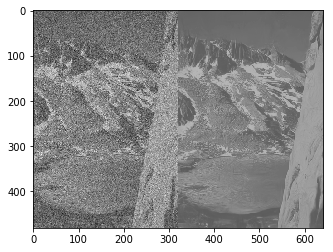

     Set68 : test030.png : 0.0259 second


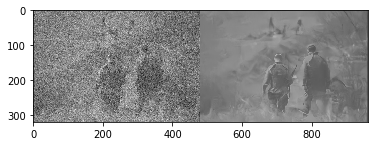

     Set68 : test031.png : 0.0269 second


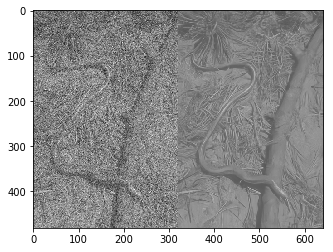

     Set68 : test032.png : 0.0259 second


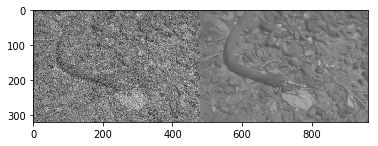

     Set68 : test033.png : 0.0259 second


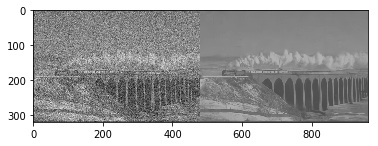

     Set68 : test034.png : 0.0259 second


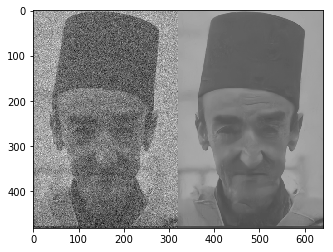

     Set68 : test035.png : 0.0259 second


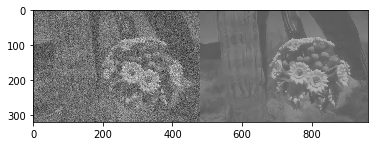

     Set68 : test036.png : 0.0259 second


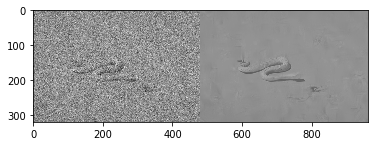

     Set68 : test037.png : 0.0259 second


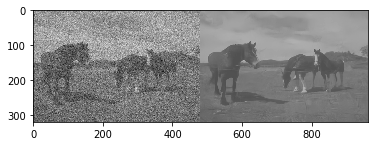

     Set68 : test038.png : 0.0259 second


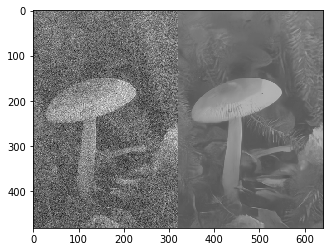

     Set68 : test039.png : 0.0260 second


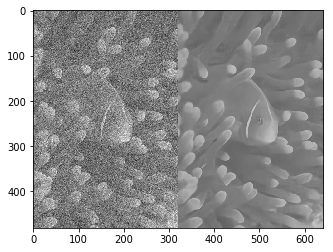

     Set68 : test040.png : 0.0259 second


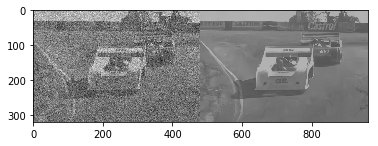

     Set68 : test041.png : 0.0270 second


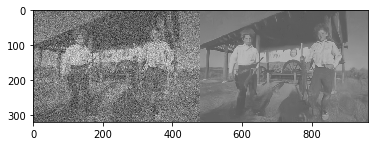

     Set68 : test042.png : 0.0269 second


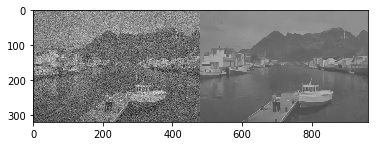

     Set68 : test043.png : 0.0260 second


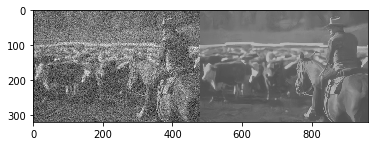

     Set68 : test044.png : 0.0259 second


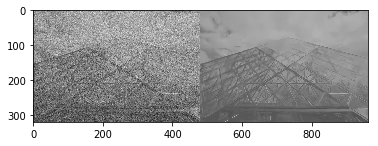

     Set68 : test045.png : 0.0249 second


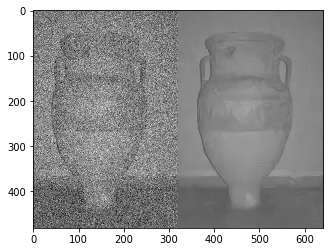

     Set68 : test046.png : 0.0259 second


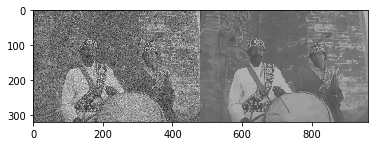

     Set68 : test047.png : 0.0259 second


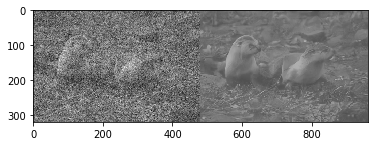

     Set68 : test048.png : 0.0259 second


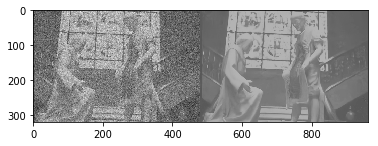

     Set68 : test049.png : 0.0259 second


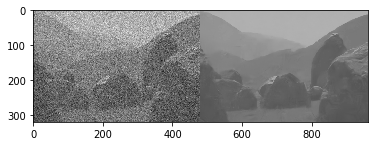

     Set68 : test050.png : 0.0259 second


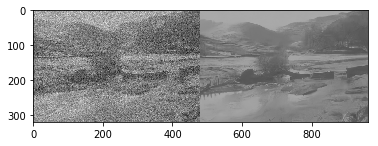

     Set68 : test051.png : 0.0259 second


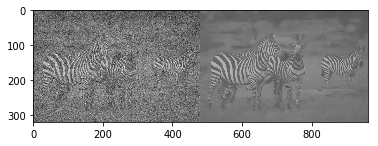

     Set68 : test052.png : 0.0259 second


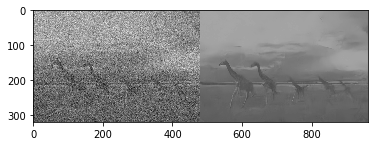

     Set68 : test053.png : 0.0270 second


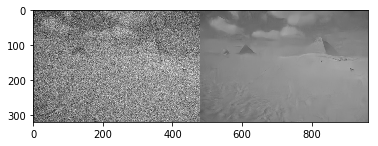

     Set68 : test054.png : 0.0259 second


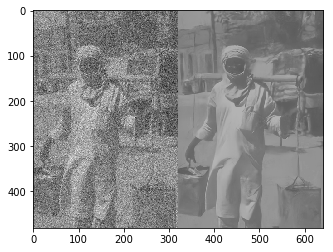

     Set68 : test055.png : 0.0279 second


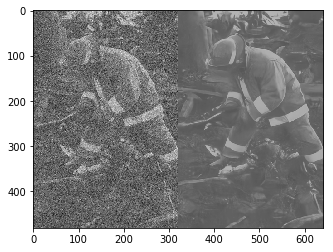

     Set68 : test056.png : 0.0269 second


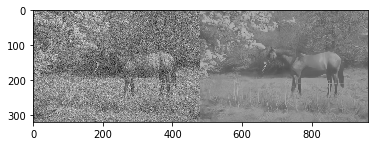

     Set68 : test057.png : 0.0279 second


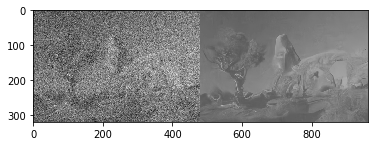

     Set68 : test058.png : 0.0259 second


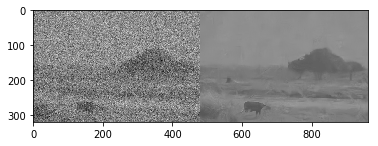

     Set68 : test059.png : 0.0260 second


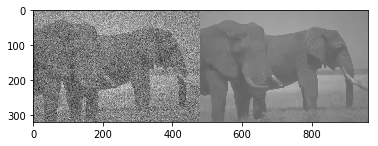

     Set68 : test060.png : 0.0259 second


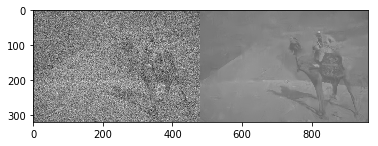

     Set68 : test061.png : 0.0279 second


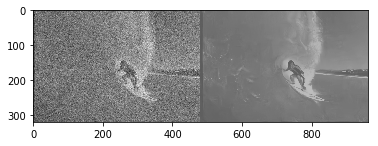

     Set68 : test062.png : 0.0250 second


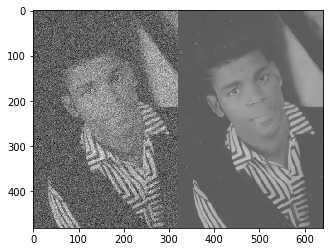

     Set68 : test063.png : 0.0259 second


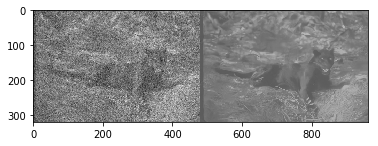

     Set68 : test064.png : 0.0259 second


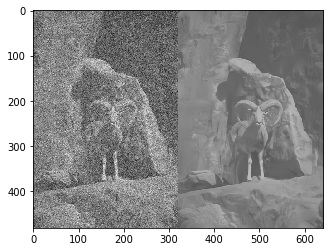

     Set68 : test065.png : 0.0259 second


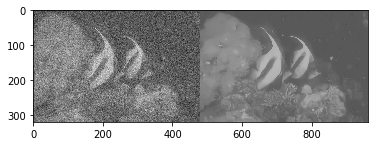

     Set68 : test066.png : 0.0269 second


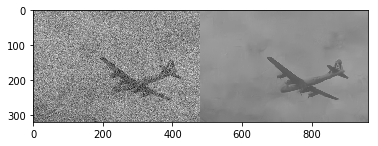

     Set68 : test067.png : 0.0259 second


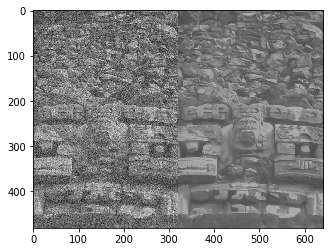

     Set68 : test068.png : 0.0259 second


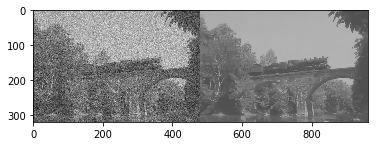

Datset: Set68      
  PSNR = 26.25dB, SSIM = 0.8269


In [9]:
set_dir = '../data/Test'
set_names = ['Set68']
sigma =50
model_dir = 'models'
model_name = 'net.pth'
result_dir = 'results'

model = torch.load(os.path.join(model_dir, model_name))

model.eval()

print(model)
if torch.cuda.is_available():
    model = model.cuda()

for set_cur in set_names:

    if not os.path.exists(os.path.join(result_dir, set_cur)):
        os.mkdir(os.path.join(result_dir, set_cur))
    psnrs = []
    ssims = []

    for im in os.listdir(os.path.join(set_dir, set_cur)):
        if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):
            
            x = np.array(imread(os.path.join(set_dir, set_cur, im)), dtype=np.float32)/255.0
            init_shape = x.shape
                
            np.random.seed(seed=0)  # for reproducibility
            y = x + np.random.normal(0, sigma/255.0, x.shape)  # Add Gaussian noise without clipping
            y = y.astype(np.float32)
            y_ = torch.from_numpy(y).view(1, -1, y.shape[0], y.shape[1])

            torch.cuda.synchronize()
            start_time = time.time()
            y_ = y_.cuda()
            r = model(y_)
            x_ = y_ - r  # inference
            
            x_ = x_.view(y.shape[0], y.shape[1])
            x_ = x_.cpu()
            x_ = x_.detach().numpy().astype(np.float32)
            r = r.view(y.shape[0], y.shape[1])
            r = r.cpu()
            r = r.detach().numpy().astype(np.float32)
            
            torch.cuda.synchronize()
            elapsed_time = time.time() - start_time
            print('%10s : %10s : %2.4f second' % (set_cur, im, elapsed_time))

            psnr_x_ = compare_psnr(x, x_)
            ssim_x_ = compare_ssim(x, x_)
            
            name, ext = os.path.splitext(im)
            show(np.hstack((y, x_)))  # show the image
            save_result(x_, path=os.path.join(result_dir, set_cur, name+'_d1'+ext))  # save the denoised image
            save_residual(r, path=os.path.join(result_dir, set_cur, name+'_residual2'+ext))  # save the denoised image
            #save_structure(s, path=os.path.join(result_dir, set_cur, name+'_structure'+ext))  # save the denoised image
            
            psnrs.append(psnr_x_)
            ssims.append(ssim_x_)
    psnr_avg = np.mean(psnrs)
    ssim_avg = np.mean(ssims)
    psnrs.append(psnr_avg)
    ssims.append(ssim_avg)

    print('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(set_cur, psnr_avg, ssim_avg))